<a href="https://colab.research.google.com/github/shivam019sarathe/Sentiment-analysis-of-covid19/blob/master/2020_part_3point1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np 
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
#Twitter api credentials
ConsumerKey       =  'DLverWWCfQ2QkfjLeeSl1FbIL'
ConsumerSecret    =  'PEMb50ExW0v82cmYrFY2Q3xKd6DthQznk8JpyBJpNHEzdpEx4v'
accessToken       =  '1223257823141777408-xckU6rEdRtcSROFobeG0k37Uuwuc4E'
accessTokenSecret =  'Vqt8I5ujOWjqKFxf3l0awLiMXlHuxmzlyMJHKchnCpDot'

In [0]:
#Create the Authentication object
authenticate  = tweepy.OAuthHandler(ConsumerKey,ConsumerSecret)

#set the access token
authenticate.set_access_token(accessToken,accessTokenSecret)

#create the api object while passing in the authenticate information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [0]:
#multiple list carries different info. of fetched tweet
tweets_text = []
tweets_id= []
tweets_date = []
tweets_time = []
tweets_retweet_count = []
try:
# Pulling individual tweets from query
    i=0
    for tweet in tweepy.Cursor(api.search , q='#covid19 -filter:retweets '  , count=100 , lang='en').items():
# Adding to list that contains all tweets
      tweets_text.append((tweet.text))
      tweets_id.append(tweet.id)
      tweets_date.append(tweet.created_at.date())
      tweets_time.append(tweet.created_at.time())
      tweets_retweet_count.append(tweet.retweet_count)
      i=i+1
      if i == 5000:
        break
      else:
        pass
except BaseException as e:
    print('failed on_status,',str(e))





In [0]:
#creating dataframe of tweet_text
twitter_df_text = pd.DataFrame(tweets_text,columns=['Tweet'])

#df of id 
twitter_df_id = pd.DataFrame(tweets_id,columns=['id'])

#df of date
twitter_df_date = pd.DataFrame(tweets_date,columns=['Date'])

#df of time
twitter_df_time = pd.DataFrame(tweets_time,columns=['Time'])

#df of retweet_count
twitter_df_retweet_count = pd.DataFrame(tweets_retweet_count,columns=['Retweet_count'])


In [7]:
#concatenating all the sub dataframes
twitter_df = pd.concat([twitter_df_id,twitter_df_date,twitter_df_time,twitter_df_text,twitter_df_retweet_count],axis=1)
twitter_df.info()
twitter_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5000 non-null   int64 
 1   Date           5000 non-null   object
 2   Time           5000 non-null   object
 3   Tweet          5000 non-null   object
 4   Retweet_count  5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


,id,Date,Time,Tweet,Retweet_count
0,1268236906426482688,2020-06-03,17:43:35,Korea #COVID19 EroticaX - Naturally Busty Gab...,0
1,1268236898935492609,2020-06-03,17:43:34,Let the great #covid19 live on till 2021.. 🤦‍♂...,0
2,1268236897794633732,2020-06-03,17:43:33,@stevelanebitch @fordnation Who are these expe...,0
3,1268236896641024005,2020-06-03,17:43:33,Since the #protest and #riots killed #COVID19 ...,0
4,1268236890706231304,2020-06-03,17:43:32,#COVID19 Itaewon daughter with braces sucks s...,0


In [8]:
#removing mentioned people
import re
for i in range(len(twitter_df['Tweet'])):
  twitter_df['Tweet'][i] = re.sub(r'@[A-Za-z0-9_A-Za-z0-9]+', '', twitter_df['Tweet'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
#to remove special characters and punctuation
spcl_char = [ '#' , '@' , '$'  , '*' , ':' , ';' , '?' , '/' ,  '!' , '|' , '\n' , '¿' , '\n' , ',' ,  '!' , ' " ','(' , ')' ,'+','-','<', '=', '>' , '[', ' \ ',']',' ` ',
             '{ ', '|' , '}',' ~ '] 
def char_remove():
  for char in spcl_char:
    twitter_df['Tweet']  = twitter_df['Tweet'].str.replace(char,"")
  return twitter_df['Tweet']
char_remove()
twitter_df.head(5)

,id,Date,Time,Tweet,Retweet_count
0,1268236906426482688,2020-06-03,17:43:35,Korea COVID19EroticaXNaturally Busty Gabbie Ca...,0
1,1268236898935492609,2020-06-03,17:43:34,Let the great covid19 live on till 2021.. 🤦‍♂️...,0
2,1268236897794633732,2020-06-03,17:43:33,Who are these expertsCertainly not the health ...,0
3,1268236896641024005,2020-06-03,17:43:33,Since the protest and riots killed COVID19 and...,0
4,1268236890706231304,2020-06-03,17:43:32,COVID19 Itaewondaughter with braces sucks step...,0


In [10]:
#removing link in Tweet if present
twitter_df['Tweet'] = twitter_df['Tweet'].str.replace('http\S+|www.\S+', '', case=False)
twitter_df.head(5)


,id,Date,Time,Tweet,Retweet_count
0,1268236906426482688,2020-06-03,17:43:35,Korea COVID19EroticaXNaturally Busty Gabbie Ca...,0
1,1268236898935492609,2020-06-03,17:43:34,Let the great covid19 live on till 2021.. 🤦‍♂️,0
2,1268236897794633732,2020-06-03,17:43:33,Who are these expertsCertainly not the health ...,0
3,1268236896641024005,2020-06-03,17:43:33,Since the protest and riots killed COVID19 and...,0
4,1268236890706231304,2020-06-03,17:43:32,COVID19 Itaewondaughter with braces sucks step...,0


In [11]:
#to remove ascii characters
twitter_df['Tweet']  = twitter_df['Tweet'].str.replace("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", '')
twitter_df.head()

,id,Date,Time,Tweet,Retweet_count
0,1268236906426482688,2020-06-03,17:43:35,Korea COVID19EroticaXNaturally Busty Gabbie Ca...,0
1,1268236898935492609,2020-06-03,17:43:34,Let the great covid19 live on till 2021..,0
2,1268236897794633732,2020-06-03,17:43:33,Who are these expertsCertainly not the health ...,0
3,1268236896641024005,2020-06-03,17:43:33,Since the protest and riots killed COVID19 and...,0
4,1268236890706231304,2020-06-03,17:43:32,COVID19 Itaewondaughter with braces sucks step...,0


In [12]:
#adding polarity and subjectivity
from textblob import sentiments
def getpolarity(text):
    blob = TextBlob(text)
    sent = blob.sentiment.polarity
    return sent

def getsubjectivity(text):
    blob = TextBlob(text)
    sent = blob.sentiment.subjectivity
    return sent
twitter_df['polarity']  = twitter_df['Tweet'].apply(getpolarity)
twitter_df['subjectivity']  = twitter_df['Tweet'].apply(getsubjectivity)
twitter_df.head()

,id,Date,Time,Tweet,Retweet_count,polarity,subjectivity
0,1268236906426482688,2020-06-03,17:43:35,Korea COVID19EroticaXNaturally Busty Gabbie Ca...,0,0.000000,0.000000
1,1268236898935492609,2020-06-03,17:43:34,Let the great covid19 live on till 2021..,0,0.468182,0.625000
2,1268236897794633732,2020-06-03,17:43:33,Who are these expertsCertainly not the health ...,0,0.000000,0.000000
3,1268236896641024005,2020-06-03,17:43:33,Since the protest and riots killed COVID19 and...,0,-0.122222,0.144444
4,1268236890706231304,2020-06-03,17:43:32,COVID19 Itaewondaughter with braces sucks step...,0,-0.300000,0.300000


In [13]:
#adding sentiment 
def category(text):
  blob1 = TextBlob(text)
  sent = blob1.sentiment.polarity
  if sent>0:
    status = "Positive"
  elif sent==0:
    status = "Neutral"
  else:
    status = "Negative"
  return status
twitter_df['Sentiment']  = twitter_df['Tweet'].apply(category)
twitter_df.head(500)


,id,Date,Time,Tweet,Retweet_count,polarity,subjectivity,Sentiment
0,1268236906426482688,2020-06-03,17:43:35,Korea COVID19EroticaXNaturally Busty Gabbie Ca...,0,0.000000,0.000000,Neutral
1,1268236898935492609,2020-06-03,17:43:34,Let the great covid19 live on till 2021..,0,0.468182,0.625000,Positive
2,1268236897794633732,2020-06-03,17:43:33,Who are these expertsCertainly not the health ...,0,0.000000,0.000000,Neutral
3,1268236896641024005,2020-06-03,17:43:33,Since the protest and riots killed COVID19 and...,0,-0.122222,0.144444,Negative
4,1268236890706231304,2020-06-03,17:43:32,COVID19 Itaewondaughter with braces sucks step...,0,-0.300000,0.300000,Negative
...,...,...,...,...,...,...,...,...
495,1268234692244967425,2020-06-03,17:34:47,This blog on latestGateway news. Huge thanks t...,0,0.300000,0.550000,Positive
496,1268234688868614145,2020-06-03,17:34:47,COVID19 CanalOT18M Horny step sister with hot ...,0,0.050000,0.483333,Positive
497,1268234679561437184,2020-06-03,17:34:44,“The same broadsweeping structural racism that...,0,-0.083333,0.279167,Negative
498,1268234672192004100,2020-06-03,17:34:43,Large Gatherings Prohibited Due to Alleged Ne...,0,0.031412,0.339529,Positive


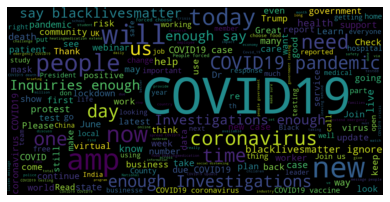

In [14]:
#VISUALISATION part starts from here

#Plotting the wordcloud 
allwords  = ' '.join([tweets for tweets in twitter_df['Tweet']])
wordcloud = WordCloud(max_font_size=160,width=1200 , height=600,max_words= 200 ).generate(allwords)
plt.imshow(wordcloud, cmap = 'plasma',interpolation='bilinear')
plt.axis('off')
plt.show( )


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


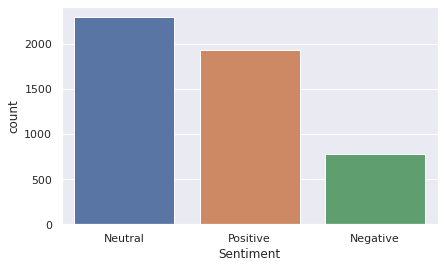

In [15]:
#plotting COUNTER plot
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x='Sentiment', data= twitter_df )

[]

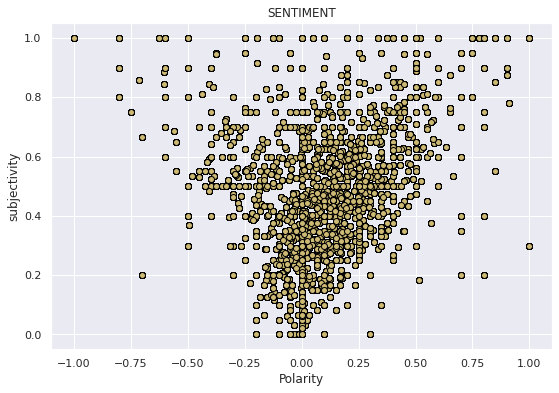

In [16]:
#plotting polarity and subjectivity
plt.figure(figsize=(8,6) )
for j in range(0,i):
  plt.scatter(twitter_df['polarity'],twitter_df['subjectivity'],edgecolor='black',cmap='plasma' )
plt.xlabel('Polarity')
plt.ylabel('subjectivity')
plt.title('SENTIMENT')
plt.plot()




In [17]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
  
def text_process(tweet):
  #msg = tweet.split()
  #for word in msg :
   # if word.lower() not in stopwords.words('english'):
    #  pass
  #return word
  return [word for word in tweet.split() if word.lower() not in stopwords.words('english')]
      
twitter_df['Tweet'].apply(text_process)
twitter_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,Date,Time,Tweet,Retweet_count,polarity,subjectivity,Sentiment
0,1268236906426482688,2020-06-03,17:43:35,Korea COVID19EroticaXNaturally Busty Gabbie Ca...,0,0.000000,0.000000,Neutral
1,1268236898935492609,2020-06-03,17:43:34,Let the great covid19 live on till 2021..,0,0.468182,0.625000,Positive
2,1268236897794633732,2020-06-03,17:43:33,Who are these expertsCertainly not the health ...,0,0.000000,0.000000,Neutral
3,1268236896641024005,2020-06-03,17:43:33,Since the protest and riots killed COVID19 and...,0,-0.122222,0.144444,Negative
4,1268236890706231304,2020-06-03,17:43:32,COVID19 Itaewondaughter with braces sucks step...,0,-0.300000,0.300000,Negative


In [0]:
#fitting Tweet data 
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
bow_transfromer = CountVectorizer(analyzer=text_process).fit(twitter_df['Tweet'])


In [0]:
Tweet_bow = bow_transfromer.transform(twitter_df['Tweet'])

In [0]:
tfidf_transformer = TfidfTransformer().fit(Tweet_bow)
tweet_tfidf = tfidf_transformer.transform(Tweet_bow)

In [0]:
from sklearn.naive_bayes import MultinomialNB
tweet_detect = MultinomialNB().fit(tweet_tfidf,twitter_df['Sentiment'])

In [22]:
tweet_pred = tweet_detect.predict(tweet_tfidf)
pred_df  = pd.DataFrame(tweet_pred,columns=['Prediction'])

net_df = pd.concat([twitter_df['Tweet'],twitter_df['Sentiment'],pred_df],axis = 1)
print(net_df )

                                                  Tweet Sentiment Prediction
0     Korea COVID19EroticaXNaturally Busty Gabbie Ca...   Neutral    Neutral
1           Let the great covid19 live on till 2021..    Positive   Positive
2     Who are these expertsCertainly not the health ...   Neutral    Neutral
3     Since the protest and riots killed COVID19 and...  Negative   Positive
4     COVID19 Itaewondaughter with braces sucks step...  Negative   Positive
...                                                 ...       ...        ...
4995   Wow ’s reply towas longer than some of&amp ‘s …   Positive   Positive
4996                Today's COVID19 numbers update &gt    Neutral    Neutral
4997  Help slow the spread of COVID19 and identify a...  Negative   Negative
4998  Todaygeneral news avail 230 pm. Expect questio...  Positive   Positive
4999  Bangladesh govt would take legal actions again...  Positive   Positive

[5000 rows x 3 columns]


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
t_train,t_test,s_train,s_test = train_test_split(twitter_df['Tweet'],twitter_df['Sentiment'],test_size = 0.3)


In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
                     ('bow',CountVectorizer(analyzer=text_process)),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', RandomForestClassifier())
])


In [25]:
pipeline.fit(t_train,s_train)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f39add2ebf8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.

In [26]:
cc = pd.concat([t_test,s_test],axis=1)
prediction = pipeline.predict(t_test)
prediction = list(prediction)
cc['pred'] = prediction


print(cc)


                                                  Tweet Sentiment      pred
317    Oh yes by all means everyone stay inside and ...   Neutral   Neutral
3451  Inquiries aren't enough. Investigations aren't...   Neutral   Neutral
731   Have been having some really interesting conve...  Positive  Positive
2277  The lockdown has resulted in the total devasta...  Positive   Neutral
1970  Don’t plan to celebrate THIS MEMORIAL DAY. Ins...  Negative   Neutral
...                                                 ...       ...       ...
3918  My analysis on COVID19 response in Armenia Fai...  Negative  Positive
3758  ON AIR COVID19 Ethiopian Presidentdiscusses re...   Neutral   Neutral
1066  World COVID19 Cases As At 032.06.2020 1030hrs ...   Neutral   Neutral
1182  Foreclosure activity is nonexistent due to COV...  Positive  Negative
3117  The lockdown is gradually easing off and that ...  Positive  Positive

[1500 rows x 3 columns]


In [27]:
from sklearn.metrics import  classification_report
print(classification_report(s_test,prediction))

              precision    recall  f1-score   support

    Negative       0.88      0.36      0.51       221
     Neutral       0.68      0.95      0.79       683
    Positive       0.87      0.67      0.76       596

    accuracy                           0.75      1500
   macro avg       0.81      0.66      0.69      1500
weighted avg       0.79      0.75      0.74      1500

